<a href="https://colab.research.google.com/github/giovannichedide/pairtrading/blob/main/PairTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pair Trading**

Pair trading é uma estratégia na qual um par de ações é negociado, sem levar em conta se o mercado está tendendo para cima ou para baixo. As posições abertas protegem uma contra a outra, sendo possível ganhar na alta, na baixa ou mesmo com o mercado "andando de lado".

**Objetivos:**


*   Escolher um par que nos dará boas oportunidades de arbitragem estatística ao longo do tempo;
*   Escolher os pontos de entrada / saída
*   Vender as ações 'overvalued' e comprar as ações 'undervalued'

Um sinal comum a ser usado para desencadear a compra de uma negociação em pares é usar a relação de preço (ação A / ação B). Se a proporção mudar significativamente, é hora de negociar. A 'significância' pode ser medida com desvio padrão.

**Passos:**



1.   Preparar a base de dados
2.   Fazer as análises estatísticas dos ativos
3.   Realizar a estratégia do trading
4.   Realizar o Backtesting









#**1. Preparação dos Dados**



*   Importar as Bibliotecas
*   Criar o DataFrame
*   Filtrar o DataFrame


In [1]:
# Libs para manipulação dos dados

import pandas as pd
import numpy as np
import yfinance as yf
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Histórico de Preços

assets = ['BBAS3.SA', 'ITUB4.SA', 'BBDC4.SA', 'PETR4.SA',
          'VALE3.SA', 'CIEL3.SA', 'ELET3.SA', 'EMBR3.SA',
          'GGBR4.SA', 'MGLU3.SA', 'RADL3.SA', 'SUZB3.SA',
          'IRBR3.SA', 'BRKM5.SA','^BVSP']

df = yf.download(assets,start='2022-04-10',end= '2023-04-10')
df = df['Adj Close']
df

[*********************100%%**********************]  15 of 15 completed


,BBAS3.SA,BBDC4.SA,BRKM5.SA,CIEL3.SA,ELET3.SA,EMBR3.SA,GGBR4.SA,IRBR3.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,RADL3.SA,SUZB3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,,,,,
2022-04-11,31.412052,17.924620,41.456646,3.033942,40.660416,13.790000,23.572273,79.155594,24.676834,6.08,15.964605,21.442587,51.519535,84.598724,116953.0
2022-04-12,31.349346,17.765852,40.728367,3.156350,41.167088,13.560000,23.596428,76.915344,24.240156,5.97,15.917581,21.433138,50.863541,84.031738,116147.0
2022-04-13,31.501612,17.949694,40.599304,3.138863,42.287613,13.900000,23.870148,77.911011,24.305195,6.03,16.256153,21.168530,51.139252,84.058739,116782.0
2022-04-14,31.528494,17.907909,40.221336,3.130119,42.287613,13.700000,23.684982,75.670761,24.463144,6.01,16.086515,21.036228,50.968121,82.879745,116182.0
2022-04-18,32.692894,18.225454,40.424145,3.191323,41.381451,13.520000,23.741339,76.417511,24.602509,5.89,15.803575,20.866121,49.532532,81.511765,115687.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,37.470348,12.896753,19.360001,4.512945,33.064636,20.790001,24.344280,22.240000,24.161875,3.31,18.868973,23.326361,41.599998,77.938690,101882.0
2023-04-03,37.029633,12.573599,19.240000,4.301113,32.587742,20.660000,24.450165,21.350000,23.485222,3.31,19.705803,22.782558,42.740002,77.958107,101506.0
2023-04-04,37.642799,12.856997,18.870001,4.337953,33.124249,20.809999,23.853352,21.980000,23.954338,3.22,19.528782,23.374063,42.349998,75.754585,101869.0


#**2. Análise Estatística**



*   Escolher o par de ativos com correlação mais alta
*   Realizar o teste de cointegração
*   Verificar a estacionaridade da série




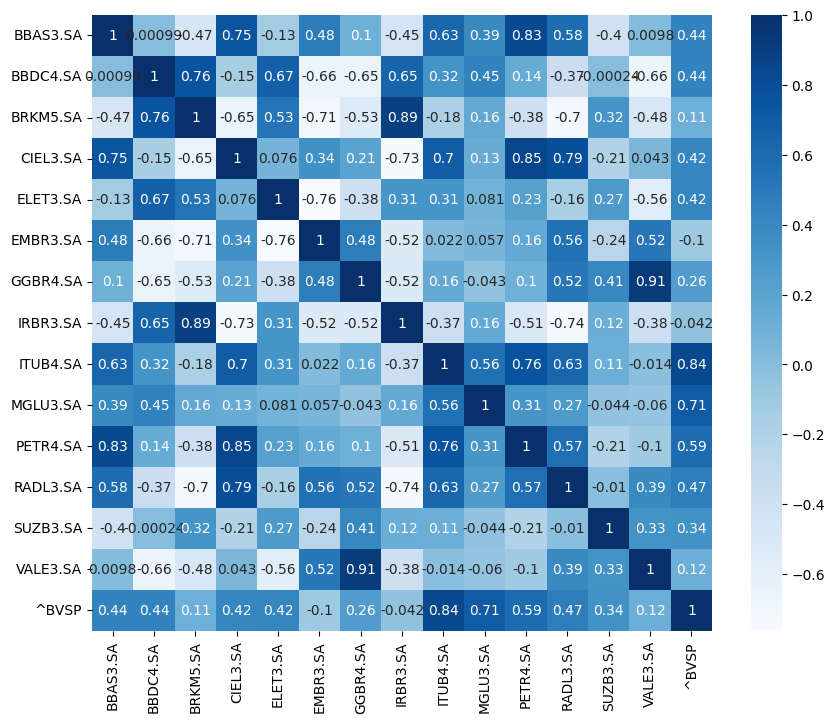

In [3]:
# Heatmap com as correlações entre os ativos

df.corr()
correl = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correl, cmap= 'Blues', annot=True)
plt.show()

In [4]:
# Gráficos da Vale e Gerdau (correlação ~ 0.91)

x = df.index

fig = go.Figure(layout = go.Layout(title=go.layout.Title(text='Preços ao longo do tempo')))

fig.add_trace(go.Scatter(x=x, y=df['VALE3.SA'], mode='lines', name='Vale S.A.'))

fig.add_trace(go.Scatter(x=x, y=df['GGBR4.SA'], mode='lines', name='Gerdau S.A.'))

fig.show()

In [5]:
# Plotagem do spread (Vale - Gerdau)

x = df.index

fig = go.Figure(layout = go.Layout(title=go.layout.Title(text='Spread entre Vale S.A. e Gerdau S.A.')))

fig.add_trace(go.Scatter(x=x, y=df['VALE3.SA'] - df['GGBR4.SA'], mode='lines', name='Spread'))

fig.show()

In [6]:
# Teste de Cointegração: Uma técnica usada para identificar
# uma potencial correlação em uma série temporal

# Determina se o spread entre os dois ativos é constante ao longo do tempo

# Hipótese nula: a propagação entre as séries não é estacionária
# Checando a cointegração com o teste Engle-Granger aumentado

import statsmodels.tsa.stattools as ts
result = ts.coint(df['VALE3.SA'],df['GGBR4.SA'])

cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('Nós queremos um valor p < 0.05 (isso significa que a cointegração existe)')
print('O valor P para o teste de cointegração em duas etapas Engle-Granger aumentado é', round(p_val,2))

Nós queremos um valor p < 0.05 (isso significa que a cointegração existe)
O valor P para o teste de cointegração em duas etapas Engle-Granger aumentado é 0.03


In [7]:
# O teste de Dickey-Fuller Aumentado é um teste estatístico usado
# para determinar se uma série temporal é estacionária ou não estacionária.

# Uma série temporal estacionária é aquela cujas propriedades estatísticas,
# como média e variância, não mudam ao longo do tempo.

from statsmodels.tsa.stattools import adfuller

VALE_ADF = adfuller(df['VALE3.SA'])
print('O valor P para o Teste Dickey-Fuller Aumentado é', round(VALE_ADF[1], 3))
GGBR_ADF = adfuller(df['GGBR4.SA'])
print('O valor P para o Teste Dickey-Fuller Aumentado é', round(GGBR_ADF[1], 3))
Spread_ADF = adfuller(df['VALE3.SA'] - df['GGBR4.SA'])
print('O valor P para o Teste Dickey-Fuller Aumentado é', round(Spread_ADF[1], 3))
Ratio_ADF = adfuller(df['VALE3.SA'] / df['GGBR4.SA'])
print('O valor P para o Teste Dickey-Fuller Aumentado é', round(Ratio_ADF[1], 3))

O valor P para o Teste Dickey-Fuller Aumentado é 0.429
O valor P para o Teste Dickey-Fuller Aumentado é 0.618
O valor P para o Teste Dickey-Fuller Aumentado é 0.203
O valor P para o Teste Dickey-Fuller Aumentado é 0.044


#**3. Realização do Trading**



*   Cálculo do Price Ratio
*   Cálculo do zscore
*   Definição dos limites
*   Definição dos pontos de entrada e saída



In [8]:
df['price_ratio'] = df['VALE3.SA'] / df['GGBR4.SA']

media = df['price_ratio'].mean()

# Cria uma lista de valores iguais à média para representar a linha horizontal
media_line = [media] * len(df)

x = df.index

fig = go.Figure(layout = go.Layout(title=go.layout.Title(text='Price Ratio entre Vale S.A. e Gerdau S.A.')))

fig.add_trace(go.Scatter(x=x, y=df['price_ratio'], mode='lines', name='Price Ratio'))

fig.add_trace(go.Scatter(x=x, y=media_line, mode='lines', name='Price Ratio mean'))

fig.show()

In [9]:
desvpad = df['price_ratio'].std()
df['zscore'] = (df['price_ratio'] - media) / desvpad

df

,BBAS3.SA,BBDC4.SA,BRKM5.SA,CIEL3.SA,ELET3.SA,EMBR3.SA,GGBR4.SA,IRBR3.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,RADL3.SA,SUZB3.SA,VALE3.SA,^BVSP,price_ratio,zscore
Date,,,,,,,,,,,,,,,,,
2022-04-11,31.412052,17.924620,41.456646,3.033942,40.660416,13.790000,23.572273,79.155594,24.676834,6.08,15.964605,21.442587,51.519535,84.598724,116953.0,3.588908,2.130184
2022-04-12,31.349346,17.765852,40.728367,3.156350,41.167088,13.560000,23.596428,76.915344,24.240156,5.97,15.917581,21.433138,50.863541,84.031738,116147.0,3.561206,1.985595
2022-04-13,31.501612,17.949694,40.599304,3.138863,42.287613,13.900000,23.870148,77.911011,24.305195,6.03,16.256153,21.168530,51.139252,84.058739,116782.0,3.521501,1.778359
2022-04-14,31.528494,17.907909,40.221336,3.130119,42.287613,13.700000,23.684982,75.670761,24.463144,6.01,16.086515,21.036228,50.968121,82.879745,116182.0,3.499253,1.662241
2022-04-18,32.692894,18.225454,40.424145,3.191323,41.381451,13.520000,23.741339,76.417511,24.602509,5.89,15.803575,20.866121,49.532532,81.511765,115687.0,3.433326,1.318146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,37.470348,12.896753,19.360001,4.512945,33.064636,20.790001,24.344280,22.240000,24.161875,3.31,18.868973,23.326361,41.599998,77.938690,101882.0,3.201520,0.108262
2023-04-03,37.029633,12.573599,19.240000,4.301113,32.587742,20.660000,24.450165,21.350000,23.485222,3.31,19.705803,22.782558,42.740002,77.958107,101506.0,3.188449,0.040043
2023-04-04,37.642799,12.856997,18.870001,4.337953,33.124249,20.809999,23.853352,21.980000,23.954338,3.22,19.528782,23.374063,42.349998,75.754585,101869.0,3.175847,-0.025734


In [10]:
df2 = df[['VALE3.SA', 'GGBR4.SA', 'price_ratio', 'zscore']]
df2

,VALE3.SA,GGBR4.SA,price_ratio,zscore
Date,,,,
2022-04-11,84.598724,23.572273,3.588908,2.130184
2022-04-12,84.031738,23.596428,3.561206,1.985595
2022-04-13,84.058739,23.870148,3.521501,1.778359
2022-04-14,82.879745,23.684982,3.499253,1.662241
2022-04-18,81.511765,23.741339,3.433326,1.318146
...,...,...,...,...
2023-03-31,77.938690,24.344280,3.201520,0.108262
2023-04-03,77.958107,24.450165,3.188449,0.040043
2023-04-04,75.754585,23.853352,3.175847,-0.025734


In [11]:
x = df2.index

fig = go.Figure(layout = go.Layout(title=go.layout.Title(text='Z score Ratio da Vale S.A. para Gerdau S.A.')))

fig.add_trace(go.Scatter(x=x, y=df2['zscore'], mode='lines', name='Z scores'))

# Cria uma lista de valores iguais à 1 para representar a linha horizontal
upper_limit_one = [1] * len(df2)

# Cria uma lista de valores iguais à 1.25 para representar a linha horizontal
upper_limit_two = [1.25] * len(df2)

# Cria uma lista de valores iguais à -1 para representar a linha horizontal
inferior_limit_one = [-1] * len(df2)

# Cria uma lista de valores iguais à -1.25 para representar a linha horizontal
inferior_limit_two = [-1.25] * len(df2)

fig.add_trace(go.Scatter(x=x, y=upper_limit_one, mode='lines', name = 'Limite Superior', marker_color='red'))
fig.add_trace(go.Scatter(x=x, y=upper_limit_two, mode='lines', name = 'Limite Superior',  marker_color='red'))
fig.add_trace(go.Scatter(x=x, y=inferior_limit_one, mode='lines', name = 'Limite Inferior', marker_color='green'))
fig.add_trace(go.Scatter(x=x, y=inferior_limit_two, mode='lines', name = 'Limite Inferior',  marker_color='green'))

fig.show()

In [12]:
x = df2.index

fig = go.Figure(layout = go.Layout(title=go.layout.Title(text='Ratio entre Vale S.A. e Gerdau S.A. com 5 e 30 dias de Média Móvel')))

# Média Móvel sobre o Price Ratio

df2['MM5_price_ratio'] = df2["price_ratio"].rolling(5).mean()
df2['MM30_price_ratio'] = df2["price_ratio"].rolling(30).mean()

df2 = df2.dropna()

fig.add_trace(go.Scatter(x=x, y=df2['MM5_price_ratio'], mode='lines', name = '5d Ratio MA',  marker_color='orange'))
fig.add_trace(go.Scatter(x=x, y=df2['MM30_price_ratio'], mode='lines', name = '30d Ratio MA',  marker_color='green'))
fig.add_trace(go.Scatter(x=x, y=df2['price_ratio'], mode='lines', name = 'Price Ratio',  marker_color='blue'))

fig.show()


<ipython-input-12-a091f584b597>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-a091f584b597>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
# Desvio Padrão para uma série de 30 períodos móvel

df2['std30'] = df2["price_ratio"].rolling(30).std()

# zcore

df2['zscore_30_5'] = (df2['MM5_price_ratio'] - df2['MM30_price_ratio']) / df2['std30']

x = df2.index

# Cria uma lista de valores iguais à 0 para representar a linha horizontal
media = [0] * len(df2)

# Cria uma lista de valores iguais à 1 para representar a linha horizontal
upper_limit_one = [1] * len(df2)

# Cria uma lista de valores iguais à 1.25 para representar a linha horizontal
upper_limit_two = [1.25] * len(df2)

# Cria uma lista de valores iguais à -1 para representar a linha horizontal
inferior_limit_one = [-1] * len(df2)

# Cria uma lista de valores iguais à -1.25 para representar a linha horizontal
inferior_limit_two = [-1.25] * len(df2)

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=df2['zscore_30_5'], mode='lines', name = 'Rooling Ratio z-score',  marker_color='blue'))
fig.add_trace(go.Scatter(x=x, y=media, mode='lines', name = 'Média', marker_color='black'))
fig.add_trace(go.Scatter(x=x, y=upper_limit_one, mode='markers', name = 'Limite Superior', marker_color='red'))
fig.add_trace(go.Scatter(x=x, y=upper_limit_two, mode='markers', name = 'Limite Superior',  marker_color='red'))
fig.add_trace(go.Scatter(x=x, y=inferior_limit_one, mode='markers', name = 'Limite Inferior', marker_color='green'))
fig.add_trace(go.Scatter(x=x, y=inferior_limit_two, mode='markers', name = 'Limite Inferior',  marker_color='green'))

fig.show()

<ipython-input-13-9dd3577351cd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-9dd3577351cd>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
df2 = df2.dropna()
df2.head(6)

,VALE3.SA,GGBR4.SA,price_ratio,zscore,MM5_price_ratio,MM30_price_ratio,std30,zscore_30_5
Date,,,,,,,,
2022-07-05,66.868996,17.887804,3.738245,2.909627,3.720487,3.444918,0.201367,1.368490
2022-07-06,67.498978,18.257559,3.697043,2.694578,3.714005,3.462712,0.199190,1.261570
2022-07-07,69.460960,19.309298,3.597281,2.173882,3.683063,3.476159,0.193964,1.066714
2022-07-08,67.858971,19.210699,3.532353,1.835002,3.651133,3.487981,0.185780,0.878196
2022-07-11,65.546013,18.849159,3.477397,1.548167,3.608464,3.497443,0.177302,0.626166
2022-07-12,65.744003,18.997061,3.460746,1.461259,3.552964,3.503861,0.172127,0.285269


In [15]:
limite_superior = 1
limite_inferior = -1

# Criando uma coluna 'sinal' com base nos limites definidos
df2['sinal'] = 0  # Inicialize com zeros
df2.loc[df2['zscore_30_5'] > limite_superior, 'sinal'] = -1  # Short VALE3.SA e Long GGBR4.SA
df2.loc[df2['zscore_30_5'] < limite_inferior, 'sinal'] = 1   # Long VALE3.SA e Short GGBR4.SA

df2.head(30)

,VALE3.SA,GGBR4.SA,price_ratio,zscore,MM5_price_ratio,MM30_price_ratio,std30,zscore_30_5,sinal
Date,,,,,,,,,
2022-07-05,66.868996,17.887804,3.738245,2.909627,3.720487,3.444918,0.201367,1.368490,-1
2022-07-06,67.498978,18.257559,3.697043,2.694578,3.714005,3.462712,0.199190,1.261570,-1
2022-07-07,69.460960,19.309298,3.597281,2.173882,3.683063,3.476159,0.193964,1.066714,-1
2022-07-08,67.858971,19.210699,3.532353,1.835002,3.651133,3.487981,0.185780,0.878196,0
2022-07-11,65.546013,18.849159,3.477397,1.548167,3.608464,3.497443,0.177302,0.626166,0
2022-07-12,65.744003,18.997061,3.460746,1.461259,3.552964,3.503861,0.172127,0.285269,0
2022-07-13,65.519012,19.112095,3.428144,1.291097,3.499184,3.510229,0.165317,-0.066810,0
2022-07-14,61.154072,18.257559,3.349521,0.880734,3.449632,3.511131,0.164328,-0.374245,0
2022-07-15,61.532070,19.342167,3.181240,0.002415,3.379410,3.508739,0.168680,-0.766715,0


In [16]:
df_long_ggbr4_short_vale3 = df2[df2['sinal'] == -1]
df_long_vale3_short_ggbr4 = df2[df2['sinal'] == 1]

In [17]:
df_long_ggbr4_short_vale3.head(5)

,VALE3.SA,GGBR4.SA,price_ratio,zscore,MM5_price_ratio,MM30_price_ratio,std30,zscore_30_5,sinal
Date,,,,,,,,,
2022-07-05,66.868996,17.887804,3.738245,2.909627,3.720487,3.444918,0.201367,1.368490,-1
2022-07-06,67.498978,18.257559,3.697043,2.694578,3.714005,3.462712,0.199190,1.261570,-1
2022-07-07,69.460960,19.309298,3.597281,2.173882,3.683063,3.476159,0.193964,1.066714,-1
2022-09-15,64.702377,19.265749,3.358415,0.927156,3.249650,3.113507,0.095734,1.422095,-1
2022-09-16,64.607719,19.426300,3.325786,0.756855,3.279794,3.122878,0.102296,1.533926,-1


In [18]:
df_long_vale3_short_ggbr4.head(5)

,VALE3.SA,GGBR4.SA,price_ratio,zscore,MM5_price_ratio,MM30_price_ratio,std30,zscore_30_5,sinal
Date,,,,,,,,,
2022-07-18,61.856071,19.210699,3.219876,0.204072,3.327905,3.508698,0.168753,-1.071342,1
2022-07-19,61.991062,19.711918,3.144852,-0.187507,3.264726,3.506897,0.172421,-1.404527,1
2022-07-20,60.650078,19.564018,3.100083,-0.421173,3.199114,3.501363,0.182770,-1.653706,1
2022-07-21,61.712070,19.588667,3.150397,-0.158567,3.159289,3.495834,0.190891,-1.763023,1
2022-07-22,62.288055,19.564018,3.183807,0.015813,3.159803,3.490290,0.197567,-1.672786,1


In [19]:
x = df2.index


fig = go.Figure(layout = go.Layout(title=go.layout.Title(text='Sinais de Long e Short')))

fig.add_trace(go.Scatter(x=x, y=df2['price_ratio'], mode='lines', name = 'Price Ratio',  marker_color='blue'))

fig.add_trace(go.Scatter(x=df_long_ggbr4_short_vale3.index, y=df_long_ggbr4_short_vale3['price_ratio'], marker_color='#11dd11', marker_size=15,
                         mode='markers', name = 'Long GGBR S.A. and short VALE S.A.', marker_symbol='triangle-up'))
fig.add_trace(go.Scatter(x=df_long_vale3_short_ggbr4.index, y=df_long_vale3_short_ggbr4['price_ratio'], marker_color='#dd2222', marker_size=15,
                         mode='markers', name = 'Long VALE S.A. and short GGBR S.A.', marker_symbol='triangle-down'))

fig.show()

#**4. Realização do Backtesting**



*   Cálculos dos retornos
*   Comparação com o Benchmark (ativos escolhidos)

In [20]:
# Calcular o log retorno diário para VALE3.SA e GGBR4.SA
df2['log_retorno_vale'] = np.log(df2['VALE3.SA']) - np.log(df2['VALE3.SA'].shift(1))
df2['log_retorno_gerdau'] = np.log(df2['GGBR4.SA']) - np.log(df2['GGBR4.SA'].shift(1))

# Inicializar a coluna de retornos da estratégia com zeros
df2['log_retorno_estrategia'] = 0.0

# Calcular o log retorno da estratégia com base no sinal
# 1 = Long VALE3.SA e Short GGBR4.SA
# -1 = Long GGBR4.SA e Short VALE3.SA
df2.loc[df2['sinal'] == 1, 'log_retorno_estrategia'] = df2['log_retorno_vale'] - df2['log_retorno_gerdau']
df2.loc[df2['sinal'] == -1, 'log_retorno_estrategia'] = df2['log_retorno_gerdau'] - df2['log_retorno_vale']

df2

,VALE3.SA,GGBR4.SA,price_ratio,zscore,MM5_price_ratio,MM30_price_ratio,std30,zscore_30_5,sinal,log_retorno_vale,log_retorno_gerdau,log_retorno_estrategia
Date,,,,,,,,,,,,
2022-07-05,66.868996,17.887804,3.738245,2.909627,3.720487,3.444918,0.201367,1.368490,-1,NaN,NaN,NaN
2022-07-06,67.498978,18.257559,3.697043,2.694578,3.714005,3.462712,0.199190,1.261570,-1,0.009377,0.020460,0.011083
2022-07-07,69.460960,19.309298,3.597281,2.173882,3.683063,3.476159,0.193964,1.066714,-1,0.028652,0.056008,0.027355
2022-07-08,67.858971,19.210699,3.532353,1.835002,3.651133,3.487981,0.185780,0.878196,0,-0.023333,-0.005119,0.000000
2022-07-11,65.546013,18.849159,3.477397,1.548167,3.608464,3.497443,0.177302,0.626166,0,-0.034679,-0.018999,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,77.938690,24.344280,3.201520,0.108262,3.232915,3.249492,0.096473,-0.171836,0,-0.018877,-0.008269,0.000000
2023-04-03,77.958107,24.450165,3.188449,0.040043,3.228776,3.248246,0.097029,-0.200669,0,0.000249,0.004340,0.000000
2023-04-04,75.754585,23.853352,3.175847,-0.025734,3.217690,3.246977,0.097740,-0.299638,0,-0.028673,-0.024712,0.000000


In [21]:
df3 = df2[['VALE3.SA', 'GGBR4.SA', 'sinal', 'log_retorno_vale', 'log_retorno_gerdau', 'log_retorno_estrategia']]

In [22]:
x = df3.index

fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=x, y=df3['log_retorno_estrategia'], mode='lines', name = 'Log Retornos Estratégia'), row=1,col=1)

fig.add_trace(go.Scatter(x=x, y=df3['log_retorno_vale'], mode='lines', name = 'Log Retornos Vale'), row=2,col=1)

fig.add_trace(go.Scatter(x=x, y=df3['log_retorno_gerdau'], mode='lines', name = 'Log Retornos Gerdau'),row=3, col=1)

fig.show()

In [23]:
# Retorno da Estratégia

retorno = df3['log_retorno_estrategia'].sum()
print(str(round(retorno*100, 2)) + "%")

18.02%


In [24]:
# Retorno da Vale

retornoVale = df3['log_retorno_vale'].sum()
print(str(round(retornoVale*100, 2)) + "%")

10.81%


In [25]:
# Retorno da Gerdau

retornoGerdau = df3['log_retorno_gerdau'].sum()
print(str(round(retornoGerdau*100, 2)) + "%")

25.33%


In [26]:
df3

,VALE3.SA,GGBR4.SA,sinal,log_retorno_vale,log_retorno_gerdau,log_retorno_estrategia
Date,,,,,,
2022-07-05,66.868996,17.887804,-1,NaN,NaN,NaN
2022-07-06,67.498978,18.257559,-1,0.009377,0.020460,0.011083
2022-07-07,69.460960,19.309298,-1,0.028652,0.056008,0.027355
2022-07-08,67.858971,19.210699,0,-0.023333,-0.005119,0.000000
2022-07-11,65.546013,18.849159,0,-0.034679,-0.018999,0.000000
...,...,...,...,...,...,...
2023-03-31,77.938690,24.344280,0,-0.018877,-0.008269,0.000000
2023-04-03,77.958107,24.450165,0,0.000249,0.004340,0.000000
2023-04-04,75.754585,23.853352,0,-0.028673,-0.024712,0.000000


In [27]:
# Sharpe pairs Trading

expected_return = df3['log_retorno_estrategia'].sum()
vol = df3['log_retorno_estrategia'].std() * len(df3) ** (1/2)
sharpe = round(expected_return / vol, 2)
sharpe

1.18

In [28]:
# Sharpe vale

expected_return_vale = df3['log_retorno_vale'].sum()
vol_vale = df3['log_retorno_vale'].std() * len(df3) ** (1/2)
sharpe_vale = round(expected_return_vale / vol_vale, 2)
sharpe_vale

0.36

In [29]:
# Sharpe gerdau

expected_return_gerdau = df3['log_retorno_gerdau'].sum()
vol_gerdau = df3['log_retorno_gerdau'].std() * len(df3) ** (1/2)
sharpe_gerdau = round(expected_return_gerdau / vol_gerdau, 2)
sharpe_gerdau

0.82

In [30]:
colors = ['#000000', '#8B0000', '#006400']

fig = go.Figure(data=[go.Bar(x=['Pairs Trading','Buy and Hold VALE S.A.','Buy and Hold GGBR4 S.A.'],
                            y=[sharpe, sharpe_vale, sharpe_gerdau],
                            marker=dict(color=colors))],
                layout=go.Layout(title=go.layout.Title(text='Sharpe Estratégias')))

fig.show()
